In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

%run loadMouse_documentation.ipynb

### Read the .eeg file

In [3]:
def read_eeg(path,nChannel):
    rawData=np.fromfile(path,dtype="int16")
    nbLine=len(rawData)
    if nbLine%nChannel!=0:
        a=str(nbLine/float(nChannel))
        print("Can't read eeg: wrong number for nChannel (%s/%s=%s)"%(nbLine,nChannel,a))
        return None
    else:
        eeg=rawData.reshape(nbLine//nChannel,nChannel)
        return eeg

path="/data/MOU035/Experiments/MOU035_2014_12_11_11_08/MOU035_2014_12_11_11_08.eeg"
eeg=read_eeg(path,36)
print(eeg)
print(eeg.shape)

#load data with txt files 
# !! put the same session
ROOT="/data"
ANIMAL="MOU035"
SESSION="MOU035_2014_12_11_11_08"
data2=Data(ROOT,ANIMAL,SESSION,redoPreprocess=False) 

[[  -10   -63   -70 ..., 16427 16424    35]
 [   40   -71  -115 ..., 32767 32767    66]
 [    8   -90   -14 ..., 30619 30615    44]
 ..., 
 [ -295  -270  -161 ...,    14    12 22053]
 [ -363  -329  -242 ...,    13    16 21957]
 [ -475  -499  -430 ...,    20    16 23761]]
(3033750, 36)
Preprocess behavior data loaded from /data/MOU035/Experiments/MOU035_2014_12_11_11_08/Analysis/preprocesseddata_binsize250ms_.p
Spike data loaded from /data/MOU035/Experiments/MOU035_2014_12_11_11_08/Analysis/rawspikedata.p



### OR  Read the .low.kwd

In [ ]:
import h5py

path="/data/MOU074/Experiments/MOU074_2015_07_17_12_54//MOU074_2015_07_17_12_54.low.kwd"

with h5py.File(path,"r") as kwd:  
    eeg=kwd.get("/recordings/0/data")[()]
print(eeg)
print(eeg.shape)
nChannel=eeg.shape[1]

#load data with txt files 
# !! put the same session
ROOT="/data"
ANIMAL="MOU025"
SESSION="MOU025_2014_08_22_15_48"
data2=Data(ROOT,ANIMAL,SESSION,redoPreprocess=False) 

### Plot one channel

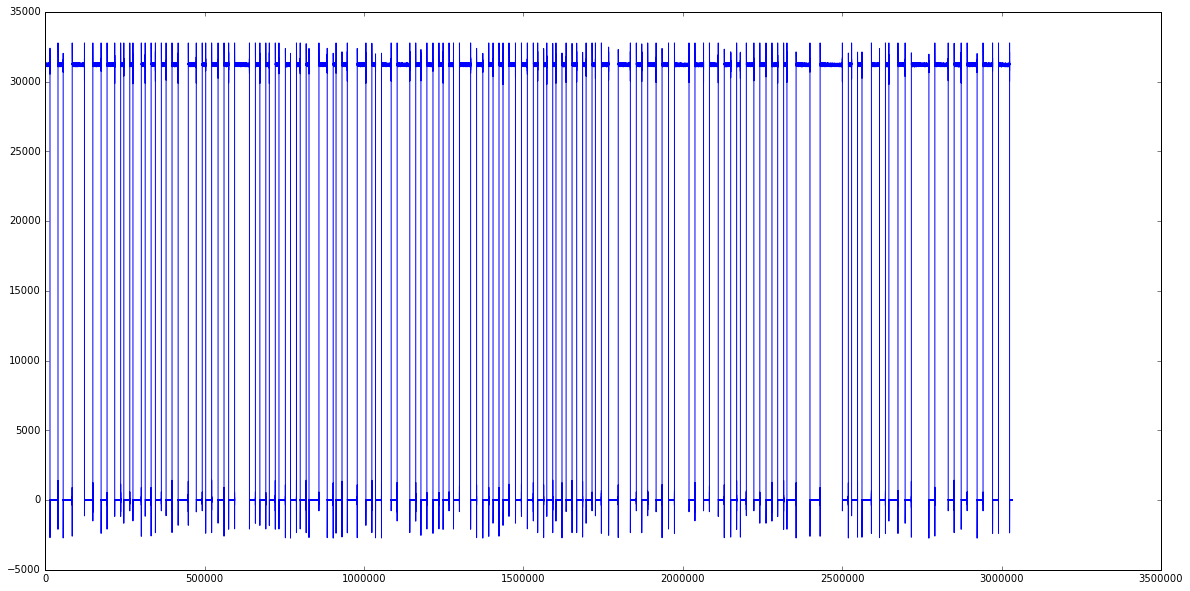

In [13]:
# select one channel (index start at 0)
channel=34
channelData=eeg[:,channel]

x1=40000
x2=100000
plt.figure(figsize=(20,10))
plt.plot(channelData,"b-")
#plt.plot(channelData,"rx")
#plt.xlim([x1,x2])

### Extract start and stop of squared signals

#### 1. find y threshold (middle of the squares)

top of the square: 32767.0
bottom of the square: -2345.09
threshold 15210.955


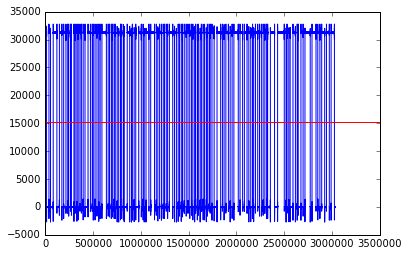

In [14]:
#ascending sort
sortData=np.sort(channelData)
#top of the squares
tup=np.mean(sortData[-100:])
#bottom of the squares
tdown=np.mean(sortData[:100])
#middle
threshold=(tup+tdown)/2.0
print("top of the square:",tup)
print("bottom of the square:",tdown)
print("threshold", threshold)

plt.plot(channelData)
plt.axhline(threshold,color="red")

#### 2. find index where the signal cross the threshold

In [19]:
#difference between signal and threshold (positive or negative)
difference=channelData-threshold
#sign of the difference (-1,1 or 0)
asign=np.sign(difference)
#change of signs (1:sign changed between this index and the one before, 0:no change)
# [-1,0,1] is not considered a change (threshold was not crossed)
changed = ((np.roll(asign, 1) - asign) != 0).astype(int)
changed[0]=0
# index of the changed
crossIndex=np.where(changed==1)[0]

print(crossIndex)
print(len(crossIndex), "detections")

[  15408   40534   56753   85094  123560  149810  175707  194377  218397
  237017  246926  265648  275590  301843  313999  332593  346037  364694
  379503  398149  417336  449145  474231  492926  503718  522347  542537
  561203  575690  594325  640988  659672  673610  692249  703332  722050
  733519  753668  769703  788427  800166  818835  827726  858914  884850
  903596  912533  931205  947884  978980 1006176 1024882 1036334 1055055
 1085436 1104143 1143839 1162454 1178786 1197467 1216523 1235234 1248257
 1266903 1280886 1299606 1334589 1353269 1372831 1391476 1404937 1423600
 1436193 1454904 1475275 1494030 1512545 1531277 1544919 1563594 1573467
 1592100 1602217 1621139 1634088 1652702 1667207 1685791 1696753 1715372
 1726011 1744710 1767340 1797537 1835621 1854255 1871301 1889966 1916274
 1934983 1955223 1973886 2019520 2038170 2065029 2083614 2111208 2130065
 2150210 2168838 2180633 2199326 2222933 2241571 2261009 2279636 2297599
 2316233 2326625 2355321 2398842 2430695 2500586 25

In [20]:
#Index where signal cross thereshold "down" (positive to negative)

#sign of the difference  (-1,1 or 0)
asign=np.sign(difference)
#replace 0 by -1
asign[asign==0]=-1

#difference of consecutives sign (1 -1  -> -2  |  1 1 -> 0)
changed=np.append([0],np.diff(asign))

#find index of "-2"
crossDownIndex=np.where(changed==-2)[0]

print(crossDownIndex)
print(len(crossDownIndex), "detections")

[  15408   56753  123560  175707  218397  246926  275590  313999  346037
  379503  417336  474231  503718  542537  575690  640988  673610  703332
  733519  769703  800166  827726  884850  912533  947884 1006176 1036334
 1085436 1143839 1178786 1216523 1248257 1280886 1334589 1372831 1404937
 1436193 1475275 1512545 1544919 1573467 1602217 1634088 1667207 1696753
 1726011 1767340 1835621 1871301 1916274 1955223 2019520 2065029 2111208
 2150210 2180633 2222933 2261009 2297599 2326625 2398842 2500586 2529381
 2561984 2616940 2646310 2697297 2771859 2832404 2873108 2923013 2971519
 3024862]
73 detections


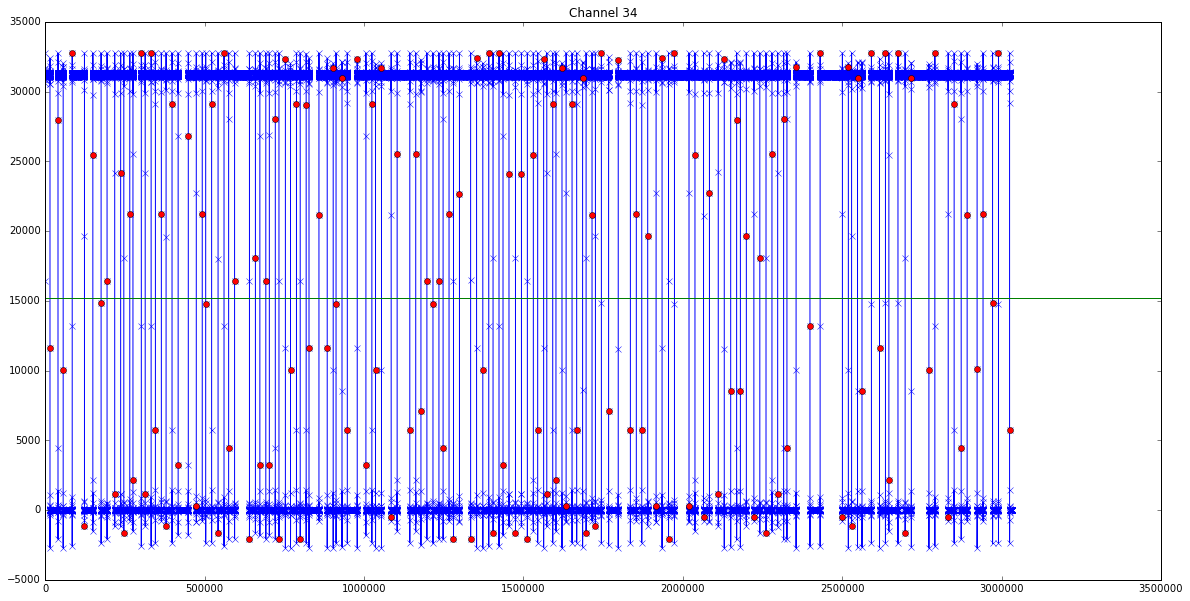

In [26]:
x1=0
x2=50000

plt.figure(figsize=(20,10))

plt.plot(channelData,"b-x")
plt.axhline(threshold,color="green")

plt.plot(crossIndex,channelData[crossIndex],"ro")

#plt.xlim([x1,x2])
plt.title("Channel "+str(channel));

### Methods to read data and extract indexes

In [5]:
def read_eeg(path,nChannel):
    # read 16 bit binary file as a 1D array
    rawData=np.fromfile(path,dtype="int16")

    # reshape the array to have nChannel Columns
    nbLine=len(rawData)
    if nbLine%nChannel!=0:
        print("wrong number of channel (%s/%s=%s)"%(nbLine,nChannel,nbLine/float(nChannel)))
    else:
        data=rawData.reshape(nbLine//nChannel,nChannel)
    return data

def get_threshold(channelData):
    #ascending sort
    sortData=np.sort(channelData)
    #top of the squares
    tup=np.mean(sortData[-100:])
    #bottom of the squares
    tdown=np.mean(sortData[:100])
    #middle
    threshold=(tup+tdown)/2.0
    return threshold

def get_all_cross_index(channelData,threshold):
    #difference between signal and threshold (positibe or negative)
    difference=channelData-threshold
    #sign of the difference (-1,1 or 0)
    asign=np.sign(difference)
    #change of signs (1:sign changed between this index and the one before, 0:no change)
    # [-1,0,1] is not considered a change (threshold was not crossed)
    changed = ((np.roll(asign, 1) - asign) != 0).astype(int)
    changed[0]=0
    # index of the changed
    crossIndex=np.where(changed==1)[0]
    return list(crossIndex)

def get_down_cross_index(channelData,threshold,value=-2):
    #difference between signal and threshold (positibe or negative)
    difference=channelData-threshold
    #sign of the difference  (-1,1 or 0)
    asign=np.sign(difference)
    #replace 0 by -1
    asign[asign==0]=-1
    #difference of consecutives sign (1 -1  -> -2  |  1 1 -> 0)
    changed=np.append([0],np.diff(asign))
    #find index of "-2"
    crossIndex=np.where(changed==value)[0]
    return list(crossIndex)

def get_up_cross_index(channelData,threshold):
    return get_down_cross_index(channelData,threshold,value=2)

def get_time_from_index(crossIndex,samplingRate):
    return [x/float(samplingRate) for x in crossIndex]
    
def read_channel(data,channel,crossIndexType="all"):
    channelData=data[:,channel]  
    threshold=get_threshold(channelData)
    
    if crossIndexType=="all":
        crossIndex=get_all_cross_index(channelData,threshold)
    elif crossIndexType=="down":
        crossIndex=get_down_cross_index(channelData,threshold)
    elif crossIndexType=="up":
        crossIndex=get_up_cross_index(channelData,threshold)   
    return channelData,crossIndex,threshold

### Plot beam break, reward, trial On/Off

**Beam break signal (blue)**

   - 0 = there's a tick of the beam in front of the photodetector (no light is received)
   - 1 = light goes through
   
   Example:    
   `0 0 0 1 1 1 1 1 1 1  0 0 1 1 1 1  0 0 0`  
   Difference:  
   `.0 0 1 0 0 0 0 0 0 -1 0 1 0 0 0 -1 0 0`
   
**Reward/end of trial (red)**

**Trial/ Intertrial (green)**

0= intertrial

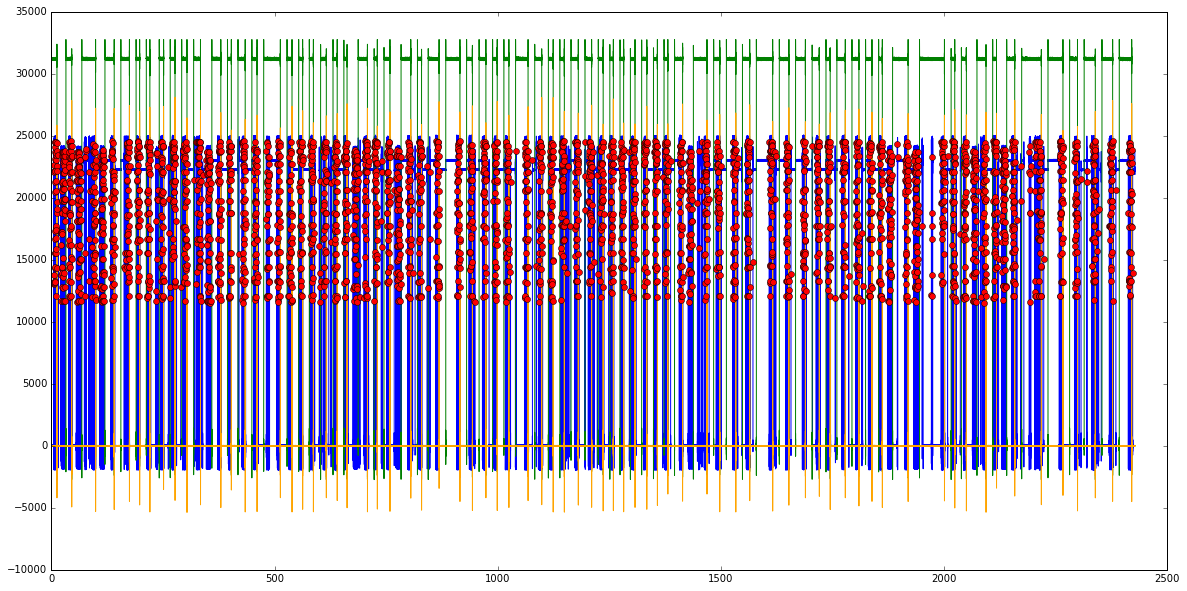

In [11]:
data=eeg

#beam breaks
beamBreak,beamBreakIndex,threshBeam=read_channel(data,35)
beamBreakDownIndex=get_down_cross_index(beamBreak,threshBeam)
beamBreakUpIndex=get_up_cross_index(beamBreak,threshBeam)
#trial On/Off
trialON,trialONIndex,thresh=read_channel(data,34)
#reward
sola,solaIndex,thresh=read_channel(data,32)

#data use later
beamBreak,beamBreakIndex,threshBeam=read_channel(data,35,crossIndexType="up")
trialON,trialONIndex,threshTrialON=read_channel(data,34,crossIndexType="all")
trialONIndexDown=get_down_cross_index(trialON,threshTrialON)
trialONIndexUp=get_up_cross_index(trialON,threshTrialON)
sola,solaIndex,threshSola=read_channel(data,32,crossIndexType="up")

#plot
xaxis=np.arange(0,data.shape[0])/1250.0

plt.figure(figsize=(20,10))
plt.plot(xaxis,beamBreak,color="blue")
plt.plot(xaxis,trialON,color="green")
plt.plot(xaxis,sola,color="orange")

plt.plot(xaxis[beamBreakUpIndex],beamBreak[beamBreakUpIndex],"ro")

#plt.xlim([xaxis[-10000],xaxis[-1]])

### Load and plot .beambreaktime

How do the beambreaks from the .dat and from the .beambreaktime match ? 

In the plot bellow

  - blue lines : beam break time signal in the .eeg (.dat). 0 is "no light". 
  - red dots: points where blue lines goes from 0 to 25000 ("up cross index", animal is leaving the tick, there is light again)
  - orange: trial/inter-trial
  - red: rewars
  - green dashed lines: allBeamBreaks, read from .beambreaktime

Things to consider:

  - the .dat and .beambreaktime are not aligned on the same 0. Electrophysiology is started after behavior
    .beambreaktime -12.9  is more or less align to .dat (-16 near the end)
    
  - ticks in .beambreaktime seem to match the animal leaving the tick ("up cross index", from 0 to 25000).   
    A tick could be define as "there is light again"
    
  - At the start of the trial, the first tick is the first "up cross index".  
    Whether the immobile period was on 0 or 25000 changes nothing 
  
  - Just after the reward, sometimes, one tick is in the .dat and not in the .beambreaktime (the 44e ticks). Seems to be the second zero in "0 0" in .beambreaktime. "0 0" is currently considered as one "0"
  


4130


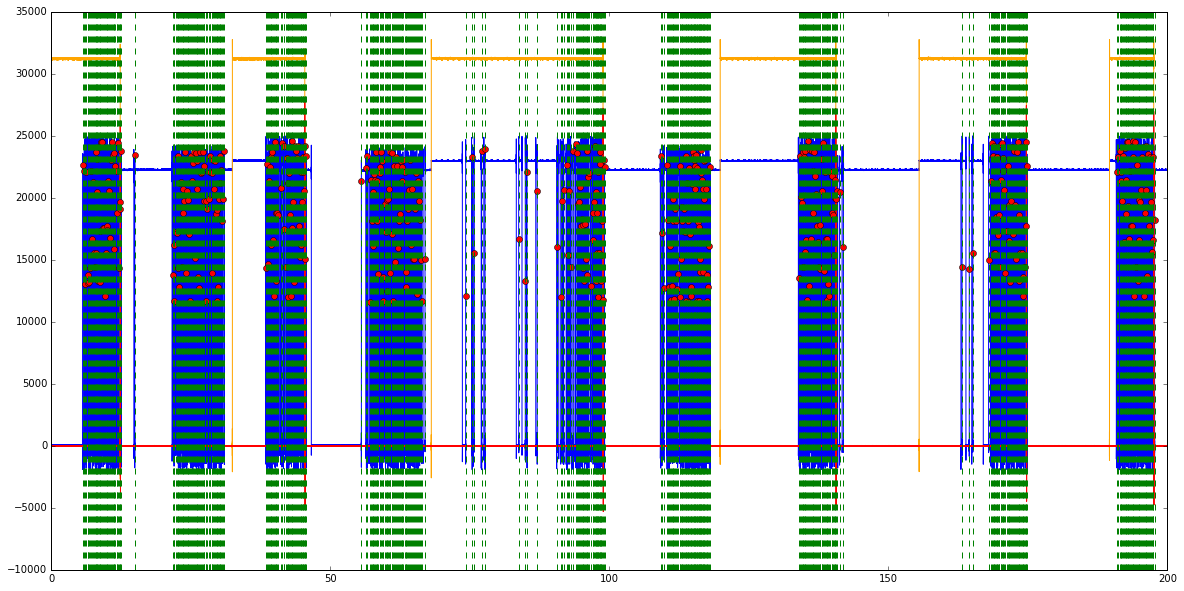

In [21]:
plt.figure(figsize=(20,10))
plt.plot(xaxis,beamBreak,"blue")
plt.plot(xaxis,trialON,"orange")
plt.plot(xaxis,sola,"red")

plt.plot(xaxis[beamBreakUpIndex],beamBreak[beamBreakUpIndex],"ro")

x1=0
x2=200
plt.xlim([x1,x2])

print(len(data2.allBeamBreak))

# The txt and dat can start at different times (usually shift is between 0 and -15)
shift=0

for x in range(0,500):
    plt.axvline(data2.allBeamBreak[x]-shift,color="green",linestyle="--")

In [46]:
sr=1250 #sampling rate
trial=-0.5
beamBreakTime={trial:[]}
i=0
stop=trialONIndex[i]
start=stop


for upCrossIndex in beamBreakIndex:
    #print(upCrossIndex,"stop",stop,"trial",trial)
    if upCrossIndex<=stop:
        beamBreakTime[trial].append((upCrossIndex-start)/float(sr))
    else:
        trial=trial+0.5
        i+=1
        start=stop
        beamBreakTime[trial]=[(upCrossIndex-start)/float(sr)]
        try:
            stop=trialONIndex[i]
        except IndexError:
            break      

del beamBreakTime[-0.5]
#if the last occurence is a trial, delete it (it was cut)
#if trial.is_integer():
#    del beamBreakTime[trial]

print(beamBreakTime[70.5])
print(beamBreakTime[71])

[0.035999999999999997, 7.2751999999999999]
[20.480799999999999, 20.833600000000001, 21.041599999999999, 21.243200000000002, 21.406400000000001, 21.538399999999999, 21.672799999999999, 21.792000000000002, 21.947199999999999, 22.071200000000001, 22.199999999999999, 22.3064, 22.424800000000001, 22.542400000000001, 22.655999999999999, 22.8032, 22.968800000000002, 23.175999999999998, 23.4008, 23.643999999999998, 23.773599999999998, 23.9312, 24.056000000000001, 24.234400000000001, 24.3536, 24.522400000000001, 24.6752, 24.884799999999998, 25.006399999999999, 25.185600000000001, 25.352, 25.539999999999999, 25.718399999999999, 25.925599999999999, 26.103200000000001, 26.244, 26.429600000000001, 26.554400000000001, 26.6736, 26.846399999999999, 27.053599999999999, 27.2576, 27.398399999999999, 27.571999999999999, 27.704000000000001]


### From eeg to python format 

  Dictionary **beamBreakTime**[ (inter)trial ] = [ list of time relative to (inter)trial start ]

  

In [51]:
# If the recording starts in the middle of a trial (first cross is "down": trial to intertrial),
# we need to remove the first incomplete trial
if trialONIndexDown[0]<trialONIndexUp[0]:
    trialONIndexDown.pop(0)
    trialONIndex.pop(0)

sr=1250 #sampling rate
trial=-0.5
beamBreakTime={trial:[]}
i=0
stop=trialONIndex[i]
start=stop

maxI=len(trialONIndex)-1

for upCrossIndex in beamBreakIndex:
    #print(upCrossIndex,"stop",stop,"trial",trial)
    while (upCrossIndex>stop) and (i<maxI):  
        trial=trial+0.5
        i+=1
        start=stop
        if trial.is_integer():
            trial=int(trial)  #converts "1.0" into "1"
        stop=trialONIndex[i]
        beamBreakTime[trial]=[]
        print(trial,upCrossIndex)
    beamBreakTime[trial].append((upCrossIndex-start)/float(sr))

#if no running or no licking till the end, add empty trials
while trial<len(trialONIndexDown):
    if isinstance(trial,float) and trial.is_integer():
        trial=int(trial)
    beamBreakTime[trial]=[]
    trial+=0.5

#remove what's before the first trial
del beamBreakTime[-0.5]


print(sorted(beamBreakTime.keys()),len(beamBreakTime))

print(beamBreakTime[70.5])
print(beamBreakTime[71.5])


0 48059
0.5 56865
1 92788
1.5 123687
2 167410
2.5 175738
3 203995
3.5 218599
4 238671
4.5 247122
5 267446
5.5 275771
6 305899
6.5 327265
7 338165
7.5 346146
8 367535
8.5 379567
9 400004
9.5 417397
10 465451
10.5 474277
11 495838
11.5 503795
12 525488
12.5 542655
13 566823
13.5 575828
14 601754
14.5 641129
15 662167
15.5 673614
16 693802
16.5 703506
17 724323
17.5 733729
18 755320
18.5 769817
19 791635
19.5 800292
20 818974
20.5 829411
21 860001
21.5 885013
22 903770
22.5 912609
23 939197
23.5 948021
24 979296
24.5 1006334
25 1026835
25.5 1036545
26 1059293
26.5 1085587
27 1134726
27.5 1143980
28 1170052
28.5 1178887
29 1208032
29.5 1216637
30 1237503
30.5 1248324
31 1271268
31.5 1281593
32 1299657
32.5 1334689
33 1357843
33.5 1373029
34 1392285
34.5 1405011
35 1426706
35.5 1436361
36 1466336
36.5 1475585
37 1494538
37.5 1512702
38 1536528
38.5 1545069
39 1564764
39.5 1573621
40 1593294
40.5 1602360
41 1625212
41.5 1634194
42 1658075
42.5 1667505
43 1688438
43.5 1696790
44 1717091
44.5 

### plot both beam break time, trial by trial

In [ ]:
for trial in beamBreakTime:
    plt.figure(figsize=(10,2))
    plt.plot(beamBreakTime[trial],[10]*len(beamBreakTime[trial]),"r|")
    #shift by 1, because we skipped the first trial (it was cut)
    plt.plot([x-shift for x in data2.beamBreakTime[trial]],[10.5]*len(data2.beamBreakTime[trial]),"b|")
    plt.ylim([9.5,11])  